# Exploration

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import weightedcalcs as wc

In [2]:
import sys
import os
sys.path.append('../src/features')
from build_features import filter_col_with_regex, get_dummies

In [3]:
# read in data 
df = pd.read_csv('../data/raw/20161201_voter_study_group.csv')

In [4]:
df_no_nulls = df.fillna(8)

## Plot weighted votes by candidate

weighted frequency: presvote16post_2016
1.0    0.406
2.0    0.399
3.0    0.027
4.0    0.012
5.0    0.002
6.0    0.016
7.0    0.008
8.0    0.130
Name: weight, dtype: float64


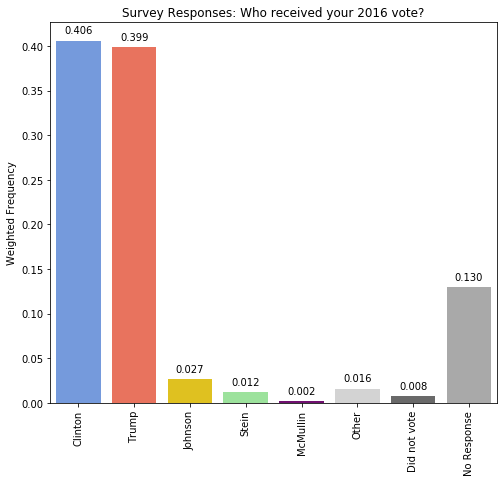

In [5]:
calc = wc.Calculator('weight')
weight = df['weight']
d = calc.distribution(df_no_nulls, 'presvote16post_2016').round(3)#.sort_values(ascending=False)
print('weighted frequency:', d)
freq_list = []
for i in d:
    freq_list.append(i)
freq_list
plt.figure(figsize=(8,7))
clrs = ['cornflowerblue','tomato', 'gold','lightgreen','purple','lightgrey','dimgrey','darkgray']
cand_list = ['Clinton','Trump','Johnson','Stein','McMullin','Other','Did not vote', 'No Response',]
bplot = sns.barplot(x = cand_list, y = freq_list, palette=clrs)
bplot.set_xticklabels(rotation=90, labels= cand_list)
bplot.set_title('Survey Responses: Who received your 2016 vote?')
bplot.set_ylabel('Weighted Frequency')

for p in bplot.patches:
 bplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.show()



## Weighted issue prioritization of climate change

In [6]:
climate_freq = calc.distribution(df_no_nulls, 'imiss_l_2016').round(3)
print('weighted frequency:', climate_freq)

weighted frequency: imiss_l_2016
1.0    0.374
2.0    0.235
3.0    0.170
4.0    0.195
8.0    0.025
Name: weight, dtype: float64


[0.374, 0.235, 0.17, 0.195, 0.025]


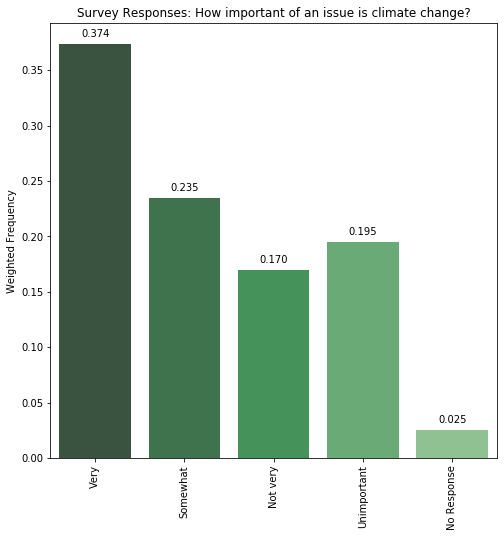

In [7]:
climate_list = []
for i in climate_freq:
    climate_list.append(i)
print(climate_list)
plt.figure(figsize=(8,8))
x = ['Very','Somewhat','Not very','Unimportant','No Response']
bplot = sns.barplot(x = x, y = climate_list, palette='Greens_d')
bplot.set_xticklabels(rotation=90, labels= x)
bplot.set_title('Survey Responses: How important of an issue is climate change?')
bplot.set_ylabel('Weighted Frequency')
for p in bplot.patches:
 bplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.show()

## Exploring relationship between community engagement and vote 

In [ ]:
# return list of community engagement column names
col_list = []
for i in range(1, 18):
    col = f'volunteerorg2_{i}_baseline'
    col_list.append(col)
    
# other community engagement fields 
comm_list = ['CIVIC_PARTICIPATION_2016',
             'pew_churatd_2016',
             'volunteer_baseline',
             'volunteerf_baseline',
             'volunteernum_baseline'
            ]

df_predictors = df[(col_list + comm_list)]

# save target subset of dataframe
df_target = pd.DataFrame(df['presvote16post_2016'])

# predictors and target
df_target_predictors = df_target.join(df_predictors)

# correlation coefficients 
df_target_predictors.corr()['presvote16post_2016'].sort_values(ascending=False).head()

## Exploring relationship between issue prioritization and party 

In [17]:
with open('../data/processed/df_target_issue.pickle', 'rb') as file:
    df_target_issue = pickle.load(file)
with open('../data/processed/df_target_issue_dummies.pickle', 'rb') as file:
    df_target_issue_dummies = pickle.load(file)
with open('../data/processed/df_3cat_issue_weight.pickle', 'rb') as file:
    df_3cat_issue_weight = pickle.load(file)

### Climate change

In [19]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_l_2016').round(3)
print(res)

imiss_l_2016           1.0    2.0    3.0    4.0    8.0
presvote16post_2016                                   
1.0                  0.657  0.235  0.060  0.023  0.025
2.0                  0.115  0.214  0.266  0.390  0.015
3.0                  0.318  0.278  0.205  0.155  0.045


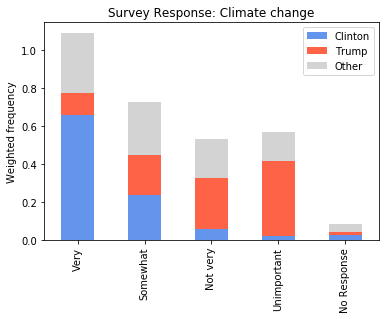

In [34]:
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Climate change')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### The budget deficit

In [35]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_p_2016').round(3)
print(res)

imiss_p_2016           1.0    2.0    3.0    4.0    8.0
presvote16post_2016                                   
1.0                  0.292  0.396  0.221  0.063  0.029
2.0                  0.706  0.236  0.029  0.007  0.022
3.0                  0.466  0.343  0.078  0.057  0.056


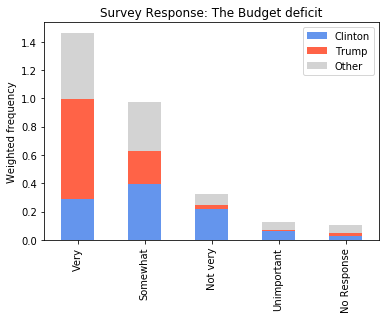

In [36]:
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: The Budget deficit')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### Abortion

imiss_t_2016           1.0    2.0    3.0    4.0    8.0
presvote16post_2016                                   
1.0                  0.376  0.321  0.180  0.098  0.024
2.0                  0.383  0.279  0.196  0.126  0.017
3.0                  0.328  0.286  0.215  0.123  0.048


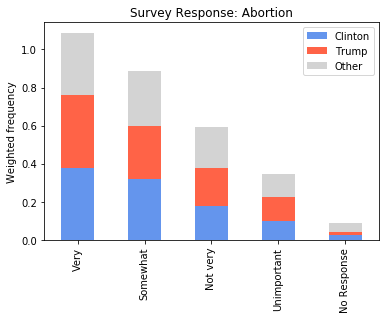

In [37]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_t_2016').round(3)
print(res)
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Abortion')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### Size of government

imiss_u_2016           1.0    2.0    3.0    4.0    8.0
presvote16post_2016                                   
1.0                  0.175  0.369  0.318  0.111  0.028
2.0                  0.630  0.288  0.056  0.007  0.019
3.0                  0.364  0.367  0.169  0.044  0.057


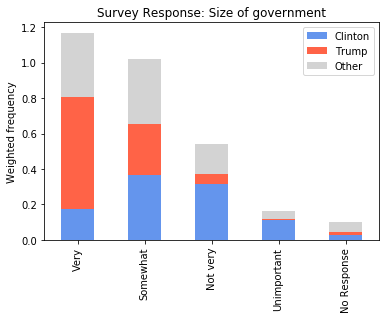

In [38]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_u_2016').round(3)
print(res)
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Size of government')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

within these columns in the dataframe, search each index and count the number of 4s. 


In [48]:
df[]

,case_identifier,weight,PARTY_AGENDAS_rand_2016,pp_primary16_2016,pp_demprim16_2016,pp_repprim16_2016,inputstate_2016,izip_2016,votereg2_2016,votereg_f_2016,...,post_HouseCand3Name_2012,post_HouseCand3Party_2012,post_SenCand1Name_2012,post_SenCand1Party_2012,post_SenCand2Name_2012,post_SenCand2Party_2012,post_SenCand3Name_2012,post_SenCand3Party_2012,starttime_2016,endtime_2016
0,779,0.358213,2,1,1.0,NaN,6,94952,1,1.0,...,NaN,NaN,Shelley Berkley,Democratic,Dean Heller,Republican,NaN,NaN,29nov2016 22:59:43,29nov2016 23:28:24
1,2108,0.562867,2,2,NaN,1.0,4,85298,1,1.0,...,NaN,NaN,Richard Carmona,Democratic,Jeff Flake,Republican,NaN,NaN,29nov2016 15:41:28,29nov2016 18:58:28
2,2597,0.552138,2,1,1.0,NaN,55,54904,1,1.0,...,NaN,NaN,Tammy Baldwin,Democratic,Tommy Thompson,Republican,NaN,NaN,29nov2016 16:08:39,29nov2016 16:32:43
3,4148,0.207591,1,1,3.0,NaN,40,74104,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14dec2016 18:46:33,14dec2016 19:11:20
4,4460,0.333729,2,2,NaN,4.0,48,78253,1,1.0,...,NaN,NaN,Paul Sadler,Democratic,Ted Cruz,Republican,NaN,NaN,01dec2016 10:17:47,01dec2016 10:59:48
5,5225,0.207186,1,1,1.0,NaN,6,94954,1,1.0,...,NaN,NaN,Dianne Feinstein,Democratic,Elizabeth Emken,Republican,NaN,NaN,29nov2016 15:30:37,29nov2016 15:50:15
6,5903,0.455791,2,1,2.0,NaN,21,40601,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30nov2016 05:50:01,30nov2016 08:46:00
7,6059,1.054491,2,2,NaN,1.0,55,53142,1,1.0,...,NaN,NaN,Tammy Baldwin,Democratic,Tommy Thompson,Republican,NaN,NaN,29nov2016 18:58:36,29nov2016 19:35:57
8,8048,0.478014,2,1,1.0,NaN,6,94707,1,1.0,...,Marilyn Singleton,Independent,Dianne Feinstein,Democratic,Elizabeth Emken,Republican,NaN,NaN,21dec2016 13:20:32,21dec2016 13:36:12
9,9869,0.416900,1,1,2.0,NaN,50,5733,1,1.0,...,NaN,NaN,Bernie Sanders,Independent,John MacGovern,Republican,NaN,NaN,29nov2016 22:27:57,29nov2016 22:42:00
